Árbol de Decisión

In [112]:
# Cargue las bibliotecas 
import  pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from IPython.display import Image
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from six import StringIO
import pydotplus
from sklearn.preprocessing import LabelEncoder  

In [113]:
#cargamos el archivo con el cual trabajaremos
dataset = pd.read_csv('datounjbg1.csv')
                      

In [114]:
dataset.head(2)

,capfin,chatbots,pagweb,redsoc,erp,sedes,clases
0,SI,SI,NO,NO,NO,NO,exito
1,NO,SI,SI,NO,NO,SI,fracaso


In [115]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   capfin    139 non-null    object
 1   chatbots  139 non-null    object
 2   pagweb    139 non-null    object
 3   redsoc    139 non-null    object
 4   erp       139 non-null    object
 5   sedes     139 non-null    object
 6   clases    139 non-null    object
dtypes: object(7)
memory usage: 7.7+ KB


In [116]:
print (dataset.count())

capfin      139
chatbots    139
pagweb      139
redsoc      139
erp         139
sedes       139
clases      139
dtype: int64


In [117]:
dataset.dtypes

capfin      object
chatbots    object
pagweb      object
redsoc      object
erp         object
sedes       object
clases      object
dtype: object

In [118]:
from sklearn.preprocessing import LabelEncoder

In [119]:
le = LabelEncoder()

In [120]:
dataset.capfin = le.fit_transform(dataset.capfin)
dataset.chatbots = le.fit_transform(dataset.chatbots)
dataset.pagweb = le.fit_transform(dataset.pagweb)
dataset.redsoc= le.fit_transform(dataset.redsoc)
dataset.erp = le.fit_transform(dataset.erp)
dataset.sedes = le.fit_transform(dataset.sedes)
dataset.clases = le.fit_transform(dataset.clases)

In [121]:
dataset

,capfin,chatbots,pagweb,redsoc,erp,sedes,clases
0,1,1,0,0,0,0,0
1,0,1,1,0,0,1,1
2,0,1,1,0,0,0,0
3,0,0,0,0,0,0,1
4,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...
134,0,1,0,0,0,0,0
135,0,1,0,0,0,0,1
136,0,0,0,0,0,0,0
137,0,1,0,0,0,0,1


In [122]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   capfin    139 non-null    int32
 1   chatbots  139 non-null    int32
 2   pagweb    139 non-null    int32
 3   redsoc    139 non-null    int32
 4   erp       139 non-null    int32
 5   sedes     139 non-null    int32
 6   clases    139 non-null    int32
dtypes: int32(7)
memory usage: 3.9 KB


In [123]:
explicativas = dataset.drop(columns='clases')
objetivo = dataset.clases

In [124]:
from sklearn.tree import DecisionTreeClassifier

In [125]:
model = DecisionTreeClassifier()

In [126]:
model.fit(X=explicativas, y=objetivo)

DecisionTreeClassifier()

Entrenamiento

Agoritmo C4.5

In [127]:
x = dataset.iloc[:,0:6].values
y = dataset.iloc[:, 6].values

In [128]:
#conjunto de datos en 75% (Entrenamiento) y 25% (Test) utilizando la función train_test_split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [129]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy',max_depth = 4, random_state =0)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)

In [130]:
from sklearn import tree
tree.export_graphviz(classifier, out_file = 'tree_social.dot')

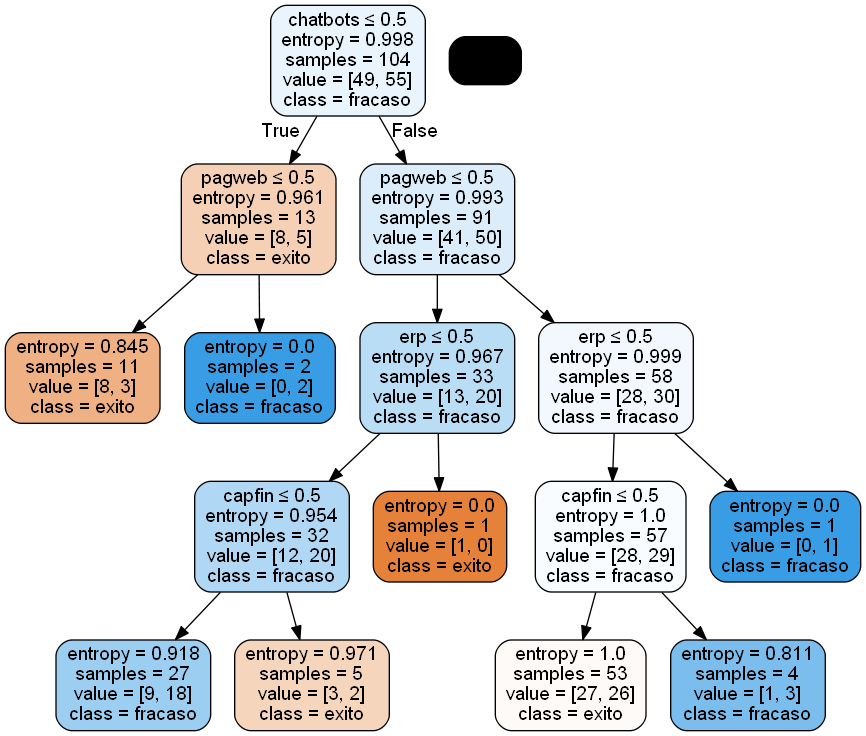

In [133]:
dot_data = StringIO()  
tree.export_graphviz(classifier, out_file=dot_data,  
                     feature_names=list (dataset.drop(['clases'], axis=1)),  
                     class_names=['exito','fracaso'],  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [95]:
print ('Número de filas en el conjunto total: {}'.format(dataset.shape [0]))
print ('Número de filas en el conjunto de entrenamiento: {}'. format (x_train.shape [0]))
print ('Número de filas en el conjunto de prueba: {}'. format (x_test.shape [0]))

Número de filas en el conjunto total: 139
Número de filas en el conjunto de entrenamiento: 104
Número de filas en el conjunto de prueba: 35


In [96]:
Dt_model = tree.DecisionTreeClassifier(max_leaf_nodes = 20)

In [97]:

Dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=20)

Accuracy

In [98]:
model = ExtraTreesClassifier()

In [99]:
model.fit(X_train,y_train)

ExtraTreesClassifier()

In [100]:
d_tree = DecisionTreeClassifier()
d_tree.fit(x_train,y_train)
#
train_predict = d_tree.predict(x_train)
#
test_predict = d_tree.predict(x_test)

In [101]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_train, train_predict))

0.6153846153846154


In [102]:
from sklearn.model_selection import cross_val_score
score =cross_val_score(d_tree,x,y,cv=10)

In [103]:
training_predict = []
testing_predict = []
for dep in range(1,20):
    decision_tree = DecisionTreeClassifier(max_depth=dep)
    decision_tree.fit(x_train,y_train)
    
    tr_predict = decision_tree.predict(x_train)
    
    training_predict.append(accuracy_score(y_train, tr_predict))
    
    ts_predict = decision_tree.predict(x_test)
    testing_predict.append(accuracy_score(y_test,ts_predict))

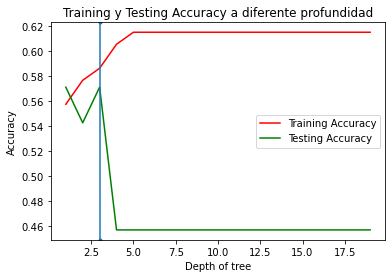

In [104]:
depth = [x for x in range(1,20)]
plt.plot(depth,training_predict,color='r', label='Training Accuracy')
plt.plot(depth,testing_predict,color='g', label='Testing Accuracy')
plt.title('Training y Testing Accuracy a diferente profundidad')
plt.xlabel('Depth of tree')
plt.ylabel('Accuracy')
plt.axvline(x=3,marker='.')
plt.legend()
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
final_d_tree = DecisionTreeClassifier(criterion = 'entropy',
                                    max_depth = 5,
                                     min_samples_leaf =3,
                                     min_samples_split = 2)
final_d_tree.fit(x_train,y_train)
#
train_predict = final_d_tree.predict(x_train)
#
test_predict = final_d_tree.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print("Training accuracy", accuracy_score(y_train,train_predict))
#
print("Testing accuracy", accuracy_score(y_test,test_predict))
